In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil
import glob

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False
# 매직명령어 => 쥬피터노트북에서 그래프 삽입 기능 
%matplotlib inline
# 글꼴 선명화 
%config InlineBackend.figure_format = 'retina'

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation

# CNN : 커널을 통해 합성곱을 구하는 것. 이미지의 특징이 두드러 지게 한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D

# MaxPooling : 커널내에서 가장 큰 값을 추출하는 방식으로 불필요한 부분을 제거한다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D

# 1차원으로 변환하는 것
from tensorflow.keras.layers import Flatten

# Dropout : 이미자나 영상, 음파 등의 데이터는 오랫동안 학습을 진행 시켜야 한다.
# 하지만 너무 빨리 과적합이 발생되면 조기 중단 때문에 학습 횟수가 줄어들 수 있다.
# 이에 은닉의 노드를 일부 사용하지 않으므로써 과적합이 빨리 오는 것을 예방하고
# 오랫동안 학습이 가능하다.
from tensorflow.keras.layers import Dropout

# Embadding : 단어의 수를 조정한다.
from tensorflow.keras.layers import Embedding

# RNN(LSTM)
from tensorflow.keras.layers import LSTM

# GAN
# 데이터 표준화
from tensorflow.keras.layers import BatchNormalization
# 데이터를 다시 구성하기 위한 것
from tensorflow.keras.layers import Reshape
# 업샘플링
from tensorflow.keras.layers import UpSampling2D
# 이미지 생성을 위해 사용할 데이터 공간을 생성
from tensorflow.keras.layers import Input
# 다수의 신경망을 연결하기 위한 것(생성자와 판별자를 연결)
from tensorflow.keras.models import Model

# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 성능이 더이상 좋아지지 않을 경우 중단 시킨다.
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

# 문장을 잘라준다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터의 수를 동일한 수로 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 가지고 단어 사전을 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 => 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 이미지 파일을 지정하여 이미지 데이터를 읽어온다.
from PIL import Image

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [2]:
# 하위 폴더들의 이름을 가져온다(결과 데이터)
categories = list(os.walk('./image/caltech-101/101_ObjectCategories'))[0][1]
categories

['accordion',
 'airplanes',
 'anchor',
 'ant',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai',
 'brain',
 'brontosaurus',
 'buddha',
 'butterfly',
 'camera',
 'cannon',
 'car_side',
 'ceiling_fan',
 'cellphone',
 'chair',
 'chandelier',
 'cougar_body',
 'cougar_face',
 'crab',
 'crayfish',
 'crocodile',
 'crocodile_head',
 'cup',
 'dalmatian',
 'dollar_bill',
 'dolphin',
 'dragonfly',
 'electric_guitar',
 'elephant',
 'emu',
 'euphonium',
 'ewer',
 'Faces',
 'Faces_easy',
 'ferry',
 'flamingo',
 'flamingo_head',
 'garfield',
 'gerenuk',
 'gramophone',
 'grand_piano',
 'hawksbill',
 'headphone',
 'hedgehog',
 'helicopter',
 'ibis',
 'inline_skate',
 'joshua_tree',
 'kangaroo',
 'ketch',
 'lamp',
 'laptop',
 'Leopards',
 'llama',
 'lobster',
 'lotus',
 'mandolin',
 'mayfly',
 'menorah',
 'metronome',
 'minaret',
 'Motorbikes',
 'nautilus',
 'octopus',
 'okapi',
 'pagoda',
 'panda',
 'pigeon',
 'pizza',
 'platypus',
 'pyramid',
 'revolver',
 'rhino',
 'rooster',
 'saxophone',
 'sc

In [3]:
# 이미지의 세로길이
image_w = 64
# 이미지의 가로길이
image_h = 64
# 이미지 채널
image_channel = 3

In [4]:
# 이전 예제에서 처리가 된 데이터를 불러온다.
X_train, X_test, y_train, y_test = np.load('./image/data1.npy', allow_pickle=True)

In [5]:
# 데이터 정규화(0 ~ 1)
X_train = X_train.astype('float64') / 255
X_test = X_test.astype('float64') / 255

print(X_train)
print(X_test)

[[[[1.         1.         1.        ]
   [0.96078431 0.96470588 0.96862745]
   [0.28235294 0.4        0.4745098 ]
   ...
   [0.23921569 0.35686275 0.44313725]
   [0.21960784 0.35294118 0.43137255]
   [0.20784314 0.34901961 0.42352941]]

  [[1.         1.         1.        ]
   [0.96078431 0.96470588 0.96862745]
   [0.28235294 0.40392157 0.47843137]
   ...
   [0.24313725 0.36078431 0.44705882]
   [0.22352941 0.35294118 0.43529412]
   [0.20784314 0.34901961 0.42352941]]

  [[1.         1.         1.        ]
   [0.96078431 0.96470588 0.96862745]
   [0.28627451 0.40784314 0.48235294]
   ...
   [0.24705882 0.36470588 0.44705882]
   [0.22745098 0.35686275 0.43921569]
   [0.20784314 0.34901961 0.42745098]]

  ...

  [[1.         1.         1.        ]
   [0.95686275 0.96862745 0.96078431]
   [0.31372549 0.41568627 0.48235294]
   ...
   [0.25490196 0.36470588 0.44705882]
   [0.24705882 0.35686275 0.43921569]
   [0.24313725 0.35294118 0.43529412]]

  [[1.         1.         1.        ]
   [0.9

In [6]:
# 2진 분류 옵션들
# out_nodes = 1
# loss_function = 'binary_crossentropy'
# activation_function = 'sigmoid'

# 다중 분류 옵션들
out_nodes = len(y_train[0])
loss_function = 'categorical_crossentropy'
activation_function = 'softmax'

# 회귀
# 출력 결과를 하나만 뽑아서 Series로 나왔다면...
# 1로 설정한다.
# if type(y) is pd.core.series.Series:
#     out_nodes = 1
# else : 
#     out_nodes = y.shape[1]
    
# loss_function = 'mean_squared_error'

In [7]:
model = Sequential()
# CNN : 이미지 데이터를 입력받아 합성곱을 수행한다.
# 첫 번째 : 노드의 개수 = 커널의 개수
# kernel_size : 커널 하나의 가로 세로 길이 2*2, 3*3 추천
# input_shape : 입력되는 이미지의 세로길이 가로길이 채널수
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(image_h, image_w, image_channel)))
model.add(Activation('relu'))

model.add(Conv2D(64, kernel_size=(3,3)))
model.add(Activation('relu'))

# 커널내에서 가장큰 값만 추출하여 불필요한 부분을 제거한다.
model.add(MaxPool2D(pool_size=2))

# 과적합 방지
model.add(Dropout(0.25))

# 다차원의 이미지 데이터를 1차원으로 변화
model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
          
model.add(Dropout(0.5))

# 출력층
model.add(Dense(out_nodes))
model.add(Activation(activation_function))

In [8]:
# 모델 컴파일
model.compile(loss=loss_function, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                        

In [9]:
# 학습모델을 저장할 경로
path = './model/03'

# 만약 폴더가 있다면 삭제한다.
if os.path.isdir(path):
    shutil.rmtree(path)

# 폴더를 생성한다.
os.makedirs(os.path.join(path))

In [10]:
path1 = path + '/{epoch}-{val_loss}.h5'
path2 = path + '/best_model.h5'

# 저장콜백
call1 = ModelCheckpoint(filepath=path1, monitor='val_loss', save_best_only=True)
call2 = ModelCheckpoint(filepath=path2, monitor='val_loss', save_best_onlu=True)

In [37]:
# 조기 중단
call3 = [EarlyStopping(monitor='val_loss', patience=50), TensorBoard(log_dir=path +'./logs', histogram_freq=1)]

In [12]:
# 학습
# validation_split : 주어진 데이터에서 사용할 검증데이터 비율
history = model.fit(X_train, y_train, epochs=200000, batch_size=150,
                    validation_data=[X_test, y_test], callbacks=[call1, call2, call3])

Epoch 1/200000
47/47 [==============================] - 5s 57ms/step - loss: 4.0423 - accuracy: 0.1897 - val_loss: 3.3977 - val_accuracy: 0.2949
Epoch 2/200000
47/47 [==============================] - 2s 46ms/step - loss: 3.2551 - accuracy: 0.3138 - val_loss: 2.9579 - val_accuracy: 0.3877
Epoch 3/200000
47/47 [==============================] - 2s 46ms/step - loss: 2.8451 - accuracy: 0.3779 - val_loss: 2.6557 - val_accuracy: 0.4349
Epoch 4/200000
47/47 [==============================] - 2s 46ms/step - loss: 2.5089 - accuracy: 0.4316 - val_loss: 2.4470 - val_accuracy: 0.4712
Epoch 5/200000
47/47 [==============================] - 2s 46ms/step - loss: 2.1922 - accuracy: 0.4845 - val_loss: 2.2565 - val_accuracy: 0.5063
Epoch 6/200000
47/47 [==============================] - 2s 46ms/step - loss: 1.9225 - accuracy: 0.5339 - val_loss: 2.1740 - val_accuracy: 0.5069
Epoch 7/200000
47/47 [==============================] - 2s 46ms/step - loss: 1.6978 - accuracy: 0.5787 - val_loss: 2.0759 - val_ac

In [14]:
# 리스트를 추출한다.
loss_list = history.history['loss']
accuracy_list = history.history['accuracy']
val_loss_list = history.history['val_loss']
val_accuracy_list = history.history['val_accuracy']

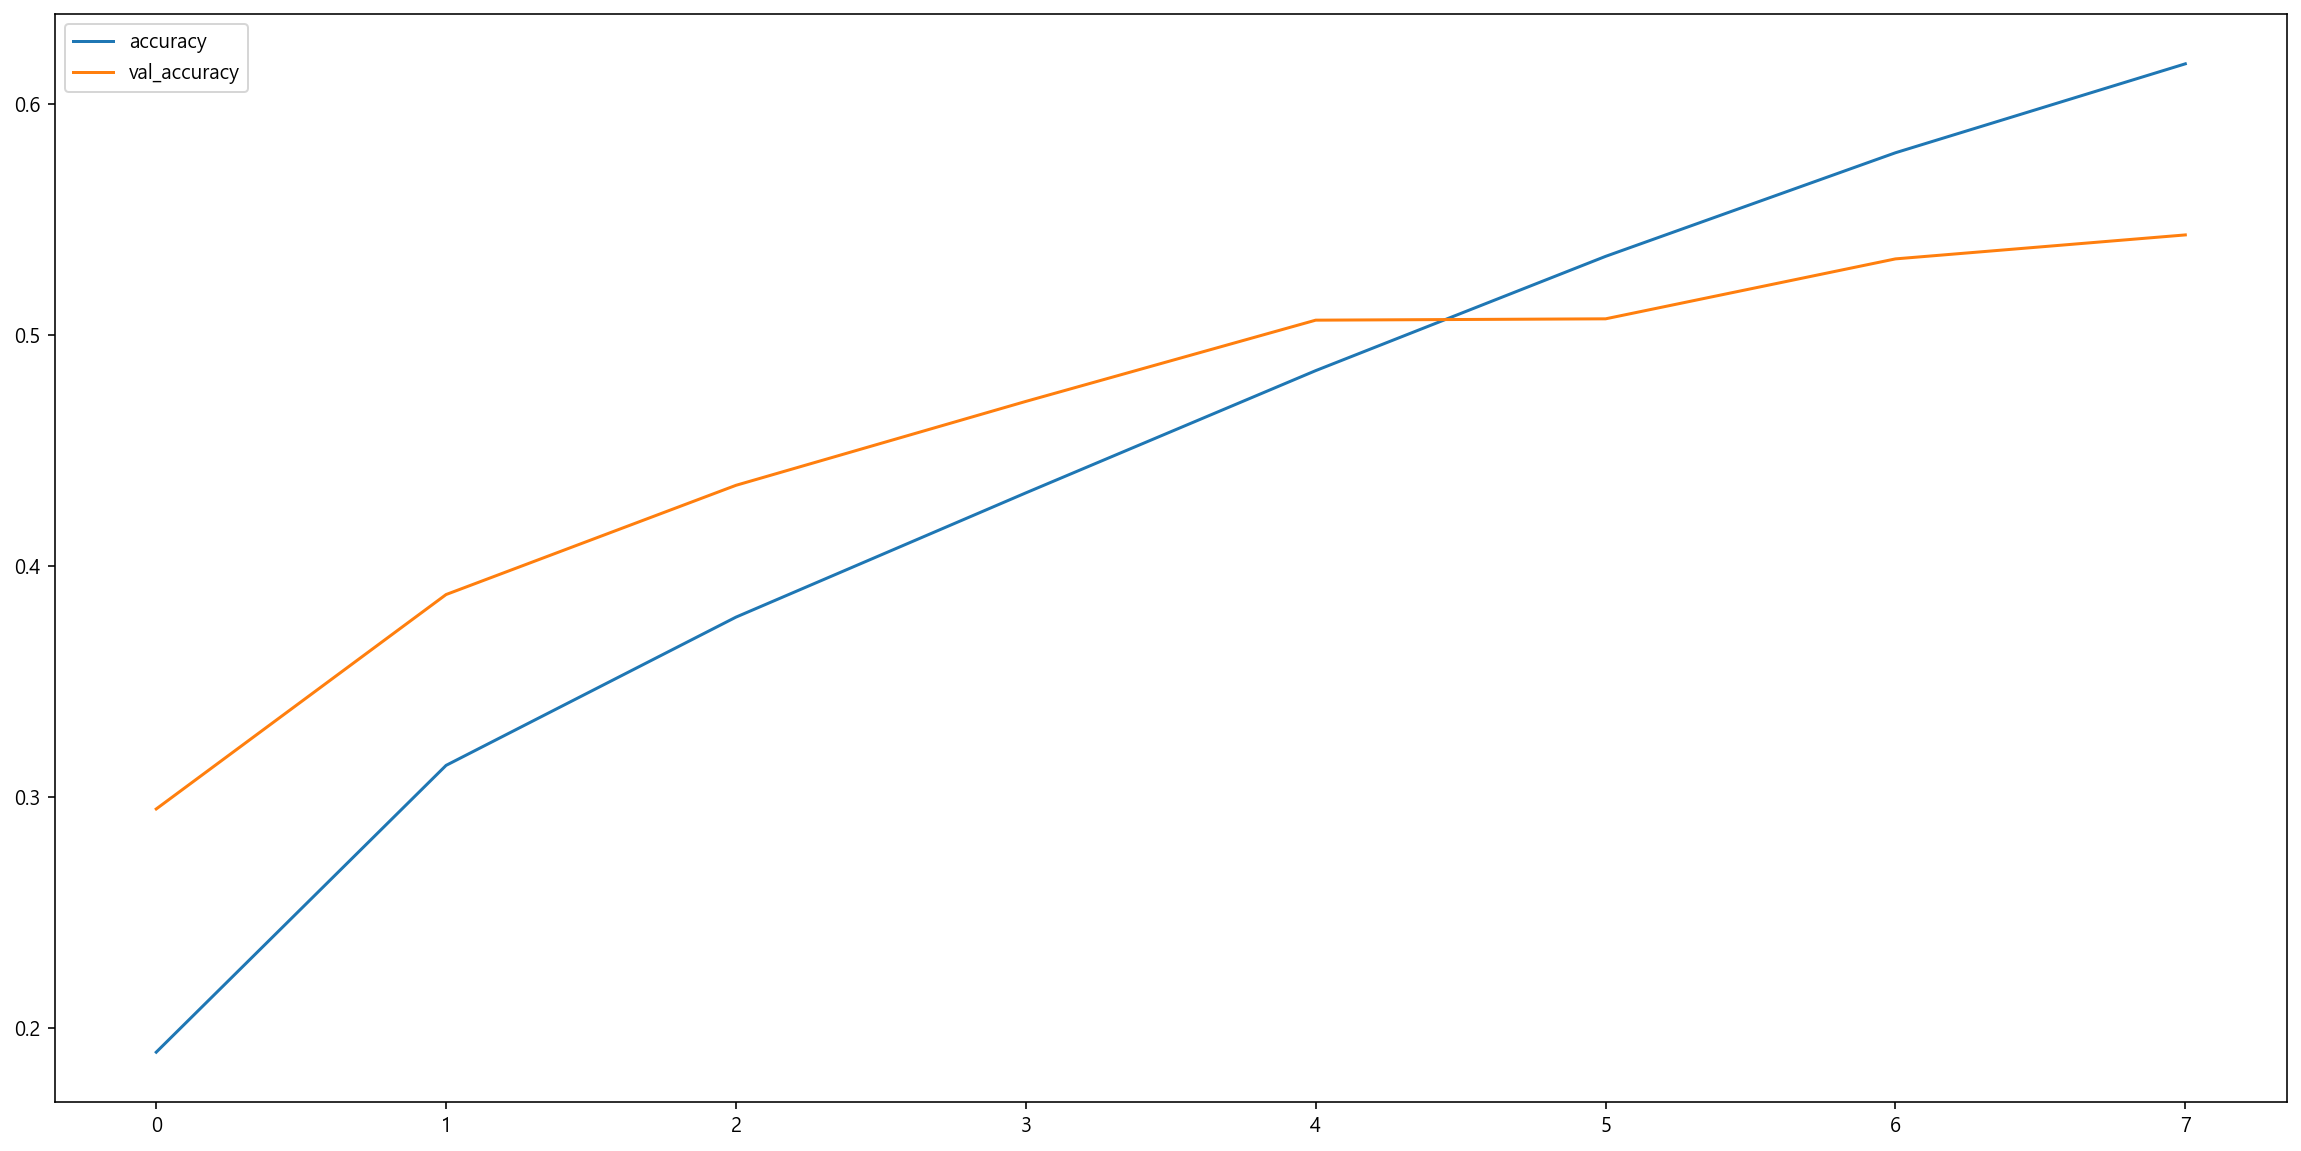

In [15]:
# 정확도 그래프
plt.figure(figsize=(20,10))
plt.plot(accuracy_list[:-50], label='accuracy')
plt.plot(val_accuracy_list[:-50], label = 'val_accuracy')
plt.legend()
plt.show()

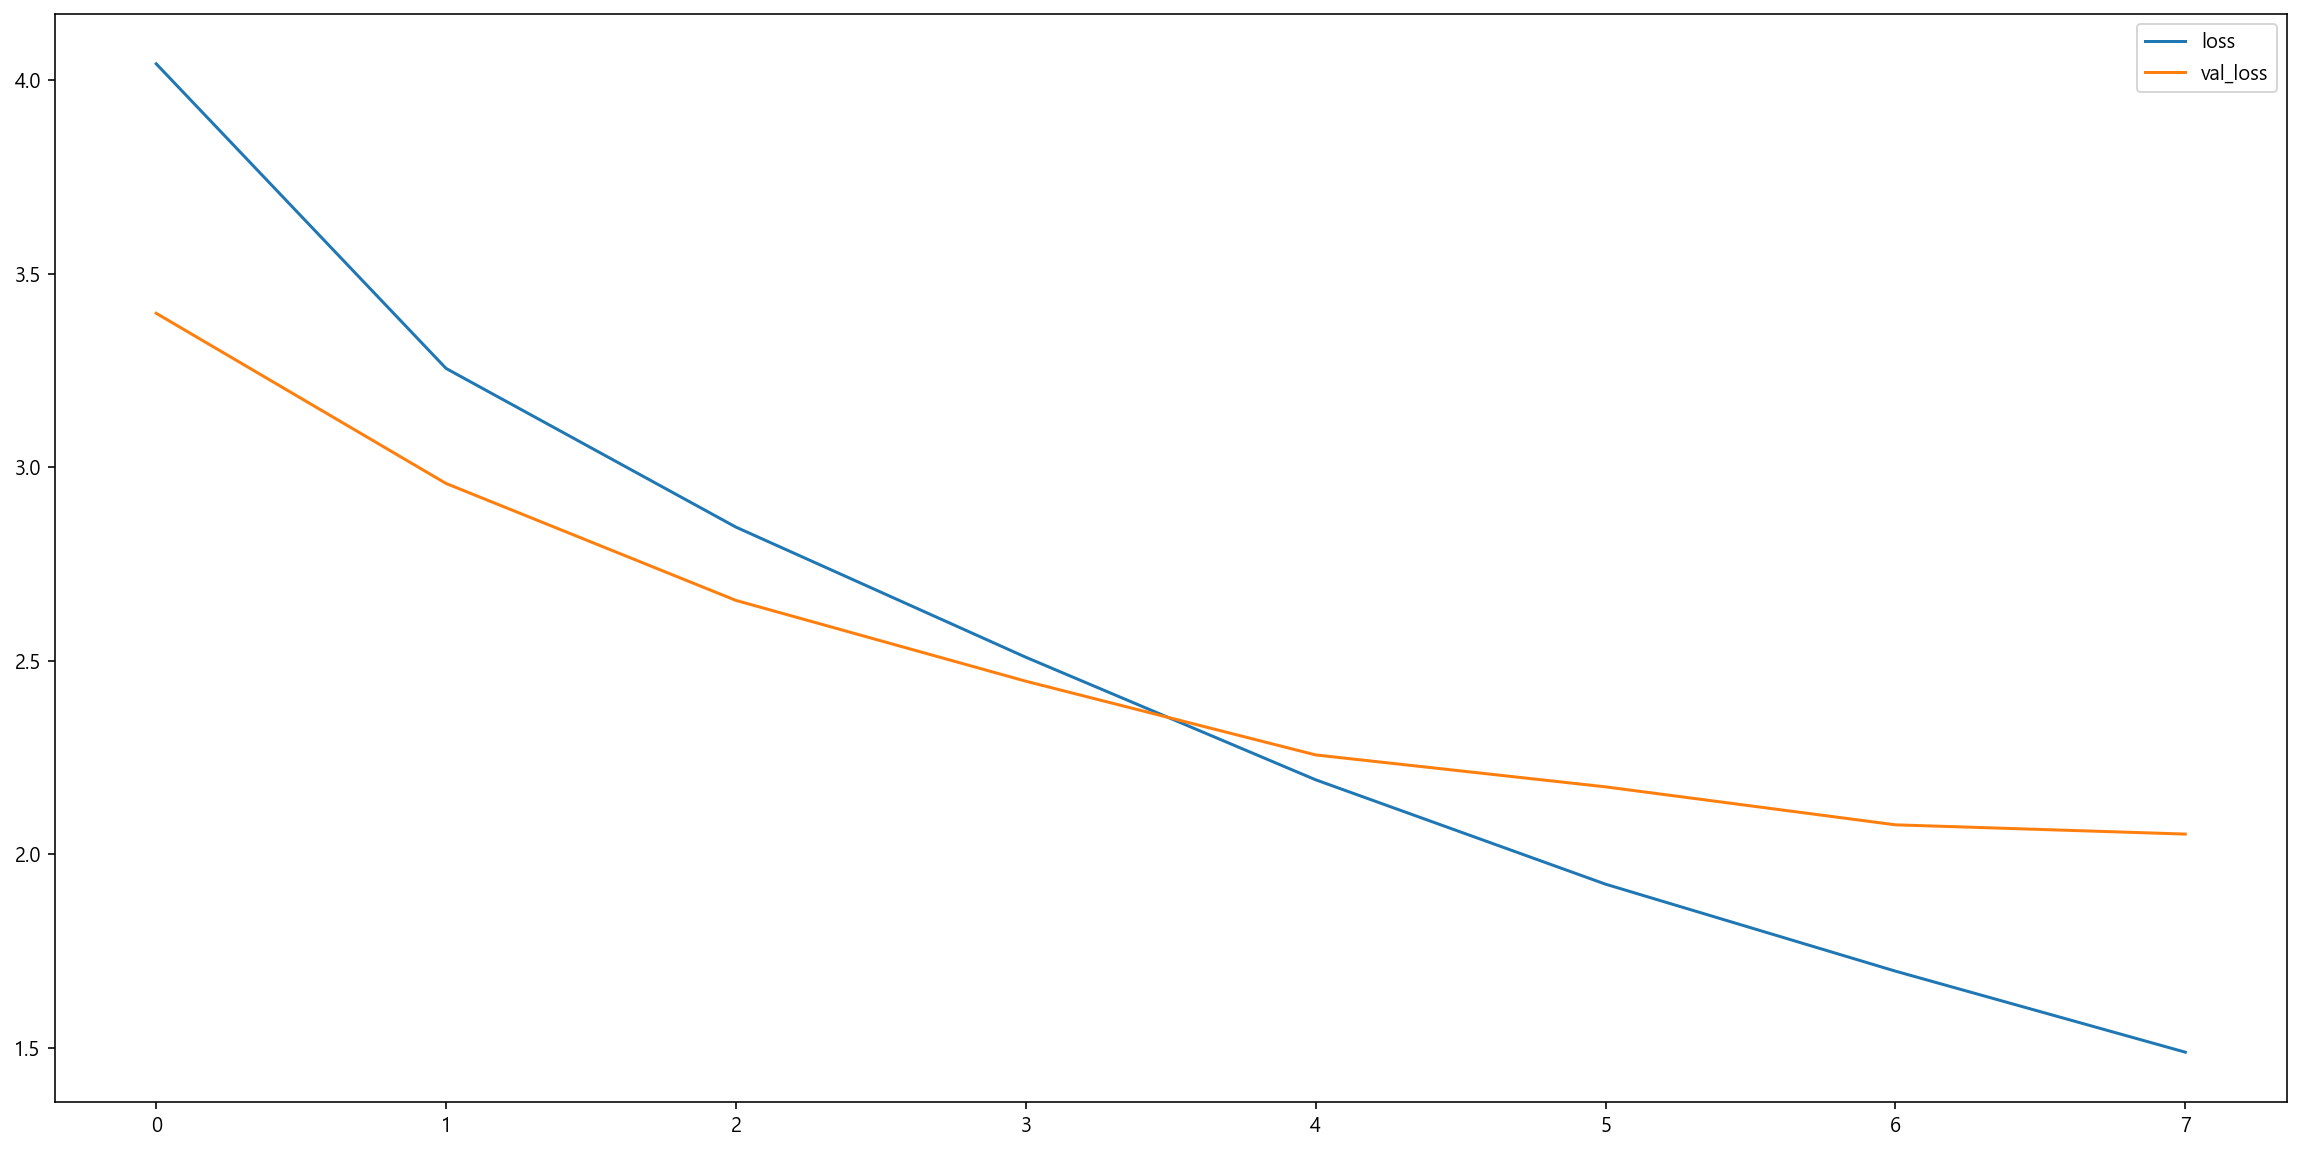

In [17]:
# 손실율 그래프
plt.figure(figsize=(20,10))
plt.plot(loss_list[:-50], label='loss')
plt.plot(val_loss_list[:-50], label = 'val_loss')
plt.legend()
plt.show()

In [18]:
%load_ext tensorboard

In [19]:
%tensorboard --logdir logs